In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import configparser
import math

In [8]:
config = configparser.ConfigParser()
config.read('../build/src/advection.ini')


nIter = int(config['run']['maxIter'])
dt    = float(config['discretization']['dt'])
dVx   = float(config['discretization']['dVx'])
minX  = float(config['discretization']['minRealx'])
maxX  = float(config['discretization']['maxRealx'])
minVx = float(config['discretization']['minRealVx'])

df = pd.read_csv("../build/src/solution.log", sep=",", header=None)

dx = (maxX - minX) / len(df.columns)

print(f"\
nIter : {nIter}\n\
dt    : {dt}\n\
dx    : {dx}\n\
dVx   : {dVx}\n\
minX  : {minX}\n\
maxX  : {maxX}\n\
minVx : {minVx}")

df

nIter : 1000
dt    : 0.001
dx    : 0.0009765625
dVx   : 0.25
minX  : 0.0
maxX  : 1.0
minVx : 0.0


,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0.000000,0.012271,0.024541,0.036807,0.049068,0.061321,0.073565,0.085797,0.098017,0.110222,...,-0.122411,-0.110222,-0.098017,-0.085797,-0.073565,-0.061321,-0.049068,-0.036807,-0.024541,-0.012271
1,0.003142,-0.009130,-0.021400,-0.033667,-0.045929,-0.058185,-0.070431,-0.082667,-0.094890,-0.107099,...,0.125528,0.113344,0.101143,0.088927,0.076697,0.064456,0.052205,0.039947,0.027682,0.015413
2,-0.006283,0.005988,0.018259,0.030527,0.042791,0.055048,0.067297,0.079535,0.091762,0.103975,...,-0.128644,-0.116465,-0.104268,-0.092056,-0.079829,-0.067591,-0.055343,-0.043086,-0.030822,-0.018554
3,0.009425,-0.002847,-0.015118,-0.027387,-0.039652,-0.051911,-0.064162,-0.076403,-0.088633,-0.100850,...,0.131759,0.119585,0.107392,0.095184,0.082961,0.070725,0.058479,0.046224,0.033962,0.021695
4,-0.012567,-0.000295,0.011976,0.024246,0.036512,0.048773,0.061026,0.073270,0.085503,0.097723,...,-0.134873,-0.122704,-0.110516,-0.098311,-0.086091,-0.073859,-0.061615,-0.049362,-0.037102,-0.024836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,0.999757,0.999952,0.999997,0.999891,0.999635,0.999228,0.998671,0.997963,0.997105,0.996097,...,0.989537,0.991233,0.992780,0.994177,0.995424,0.996522,0.997470,0.998267,0.998914,0.999410
508,-0.999682,-0.999916,-1.000000,-0.999933,-0.999715,-0.999347,-0.998828,-0.998159,-0.997339,-0.996369,...,-0.989079,-0.990813,-0.992398,-0.993833,-0.995119,-0.996255,-0.997241,-0.998077,-0.998763,-0.999298
509,0.999598,0.999871,0.999993,0.999964,0.999785,0.999455,0.998975,0.998344,0.997563,0.996632,...,0.988611,0.990383,0.992006,0.993480,0.994804,0.995979,0.997003,0.997877,0.998601,0.999175
510,-0.999504,-0.999815,-0.999976,-0.999986,-0.999845,-0.999554,-0.999112,-0.998520,-0.997778,-0.996885,...,-0.988133,-0.989944,-0.991605,-0.993117,-0.994480,-0.995692,-0.996755,-0.997668,-0.998430,-0.999043


Vx[0] = 0.0


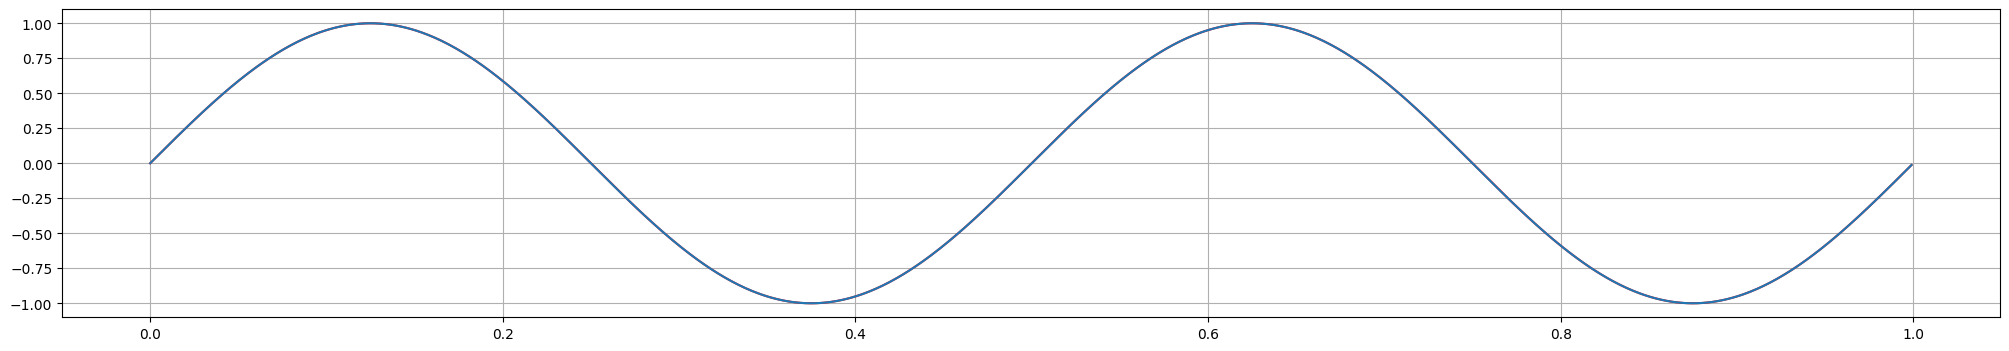

Vx[1] = 0.25


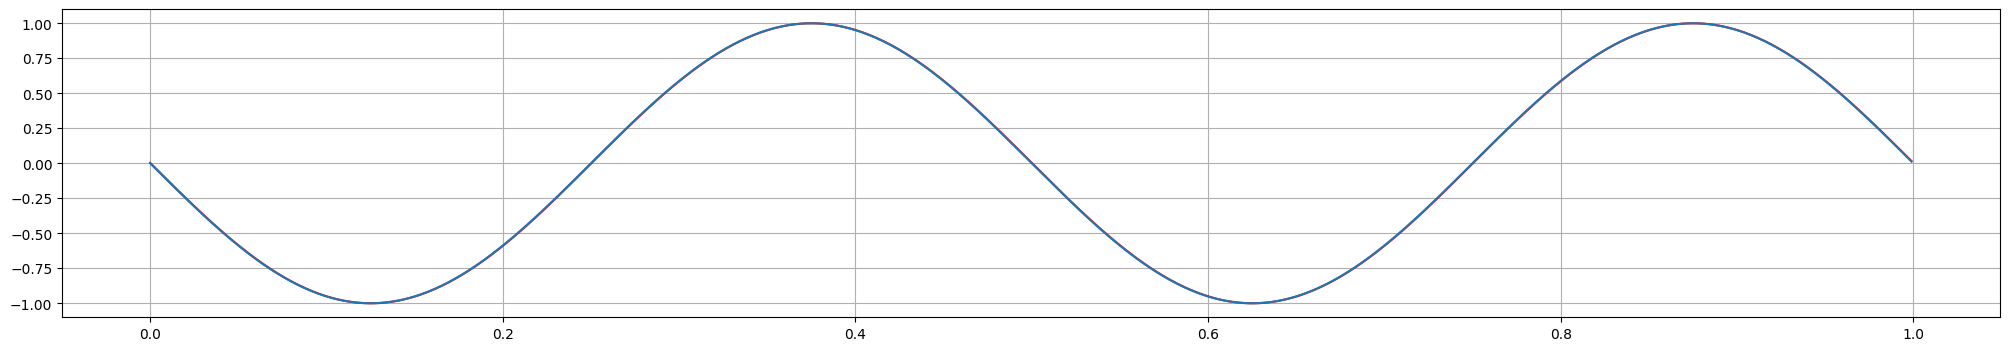

Vx[2] = 0.5


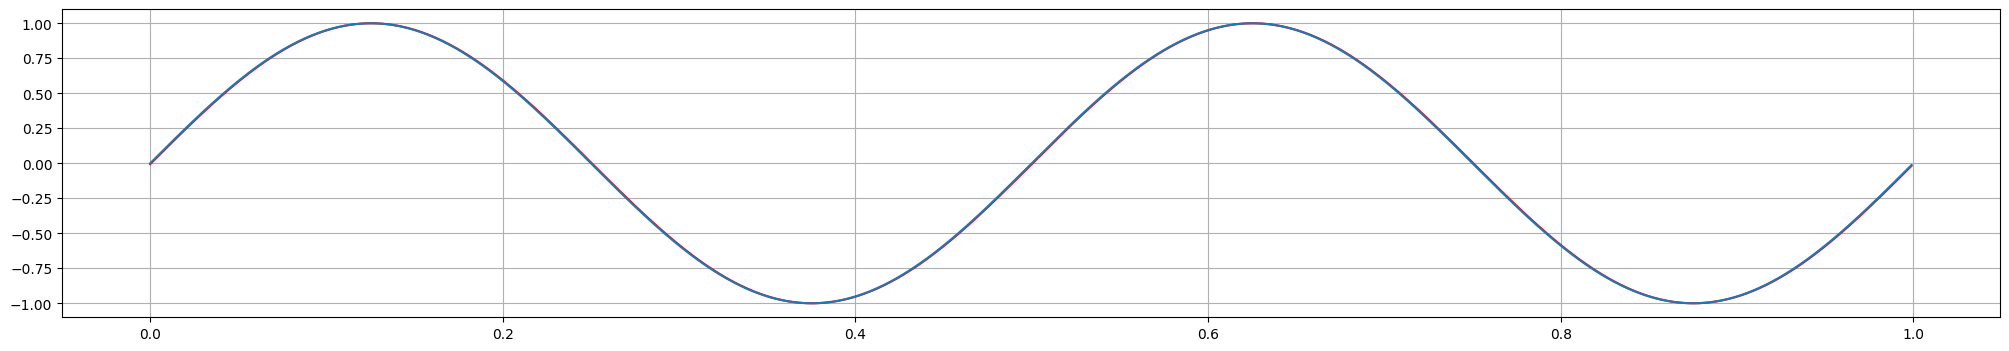

Vx[3] = 0.75


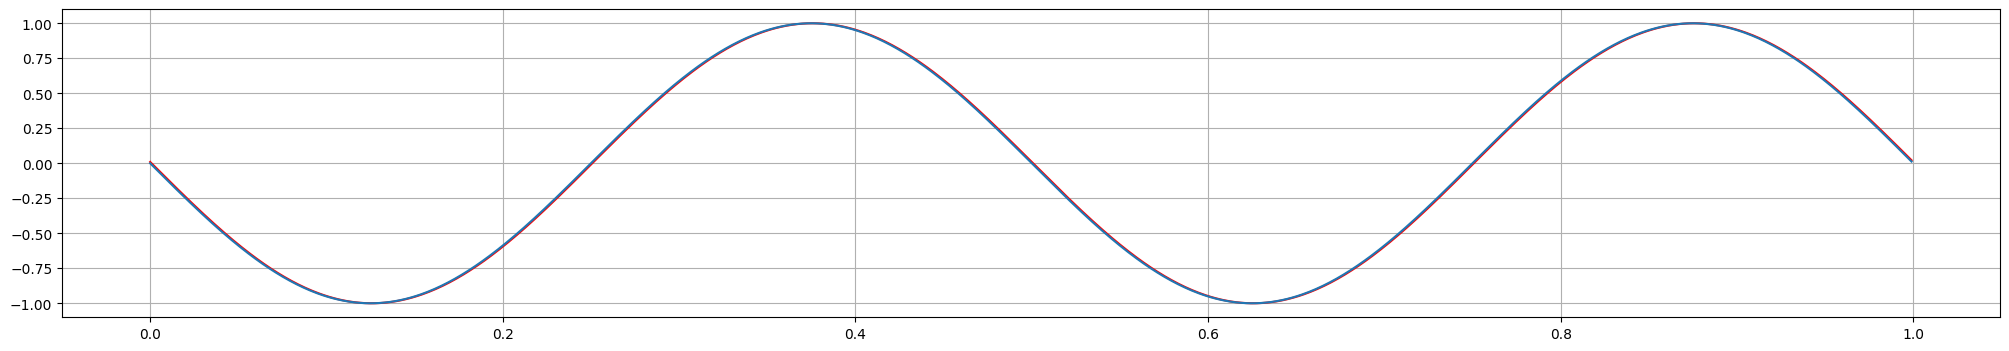

Vx[4] = 1.0


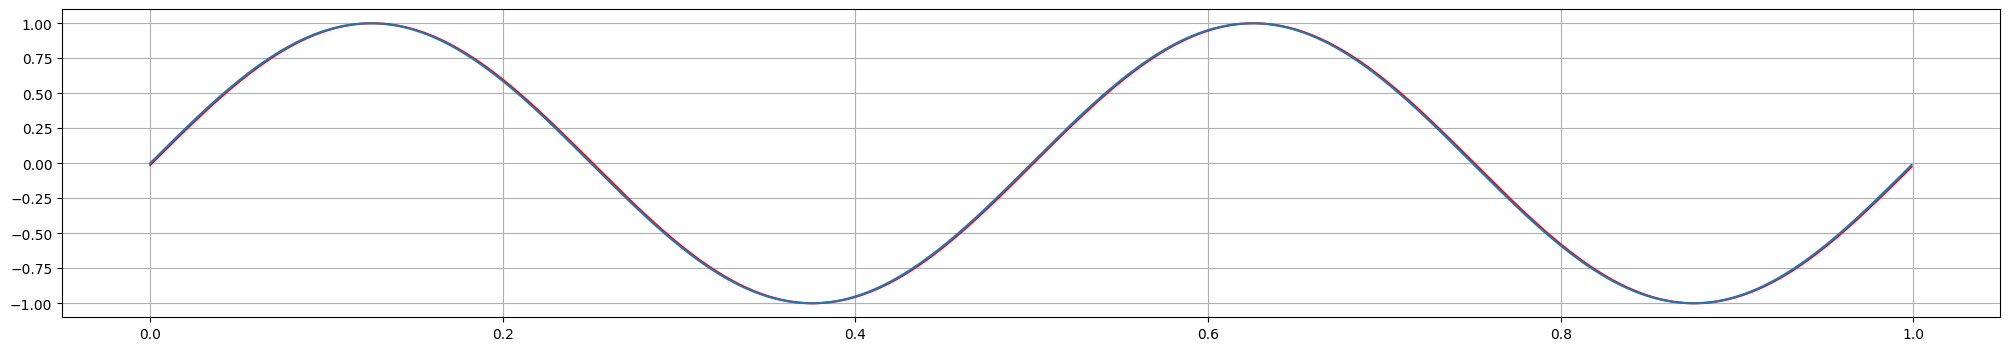

Vx[5] = 1.25


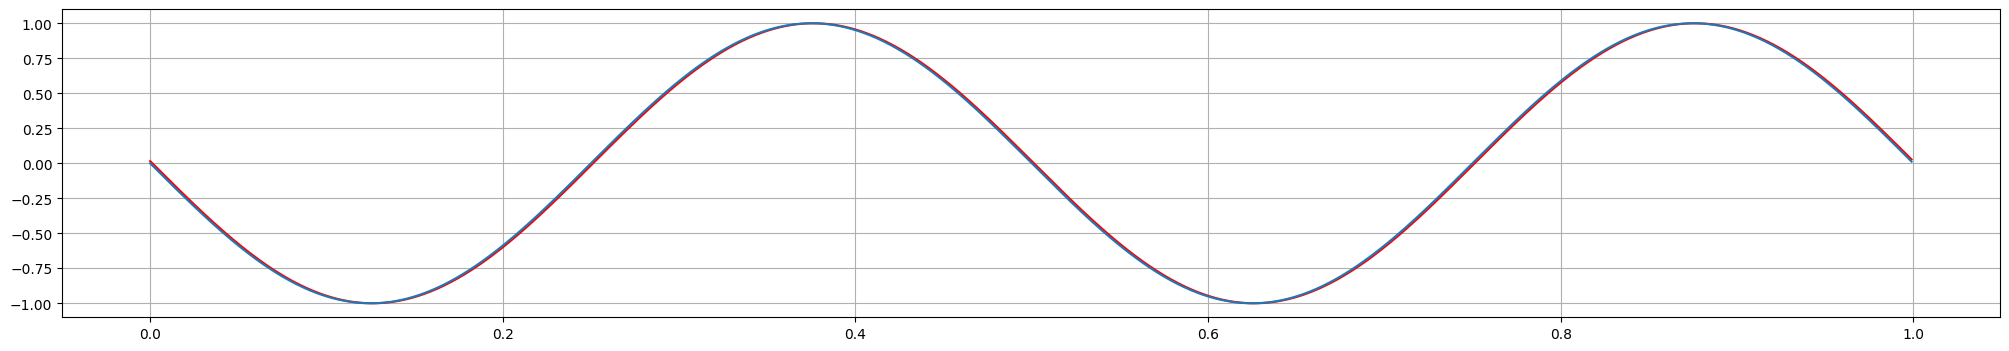

Vx[6] = 1.5


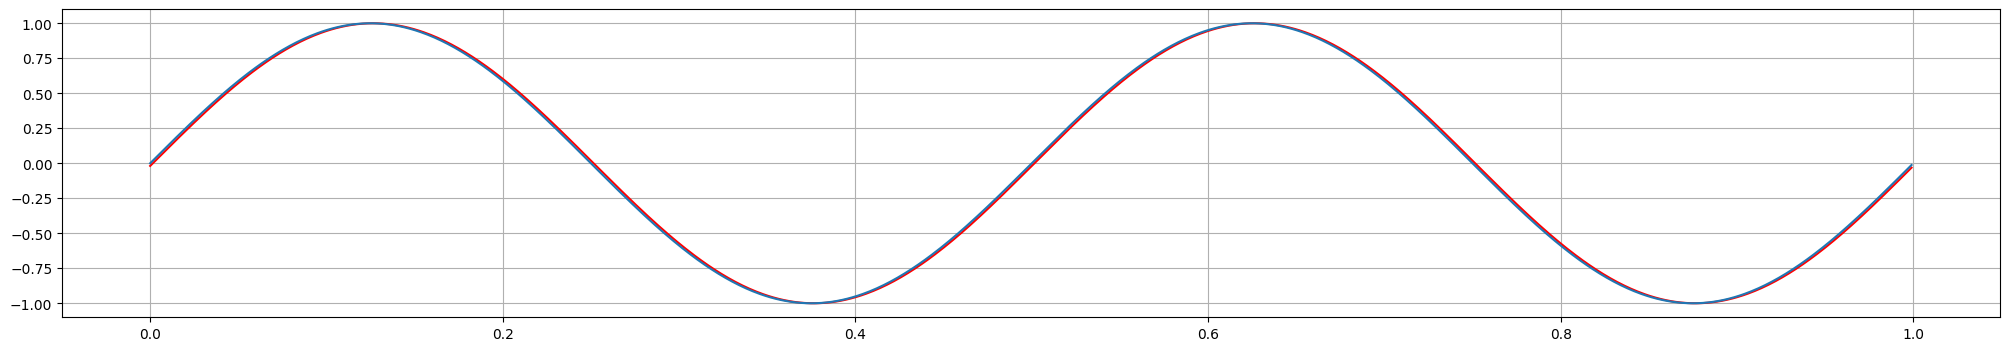

Vx[7] = 1.75


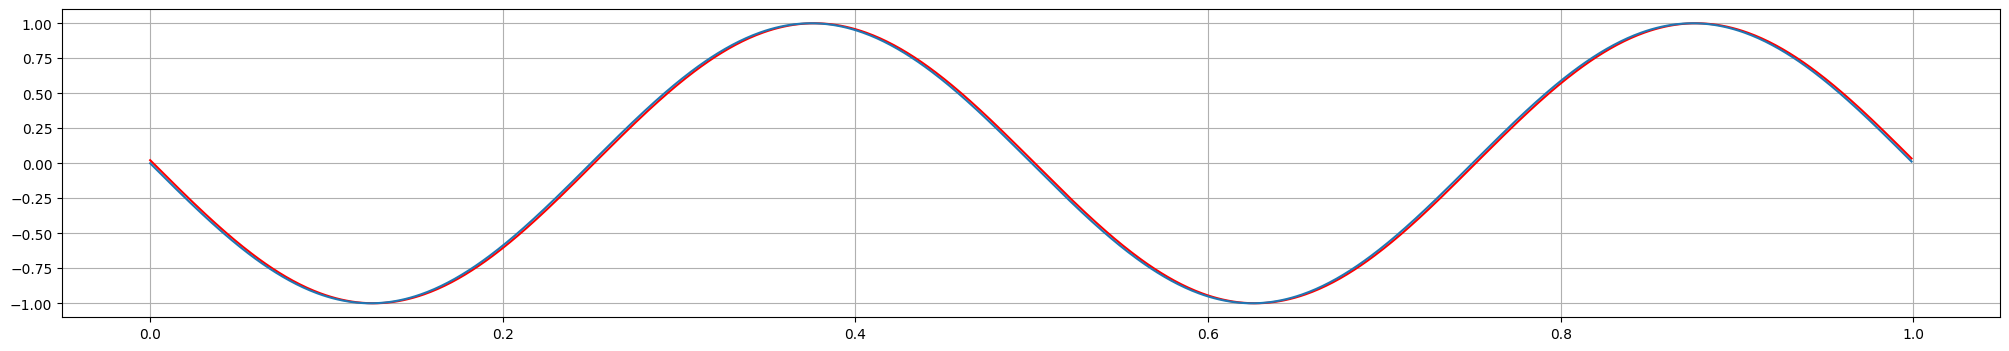

Vx[8] = 2.0


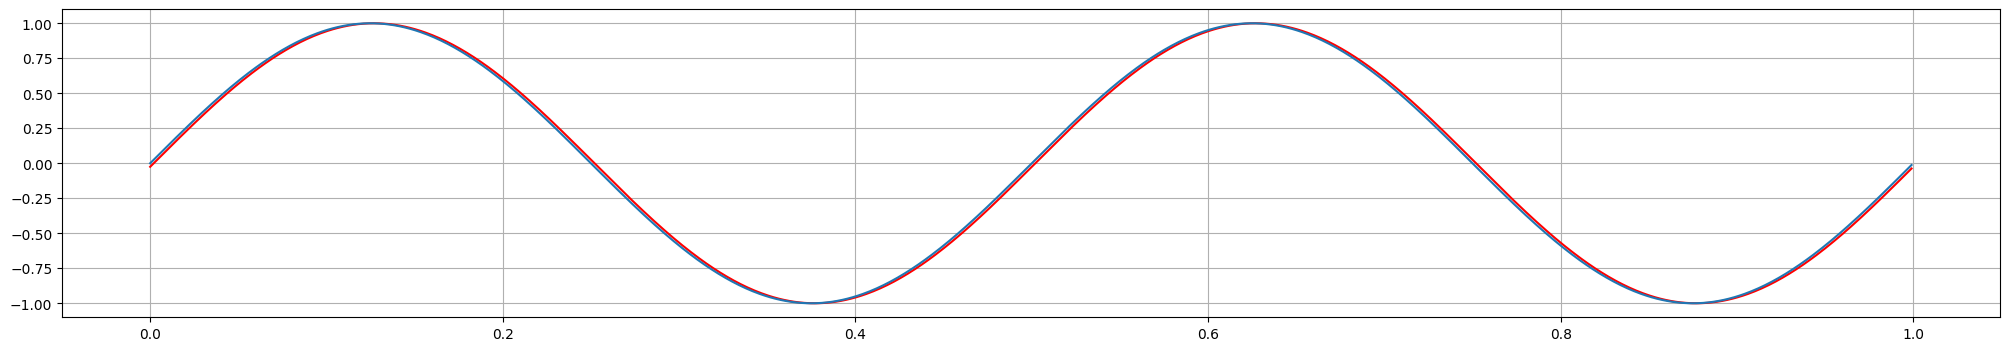

Vx[9] = 2.25


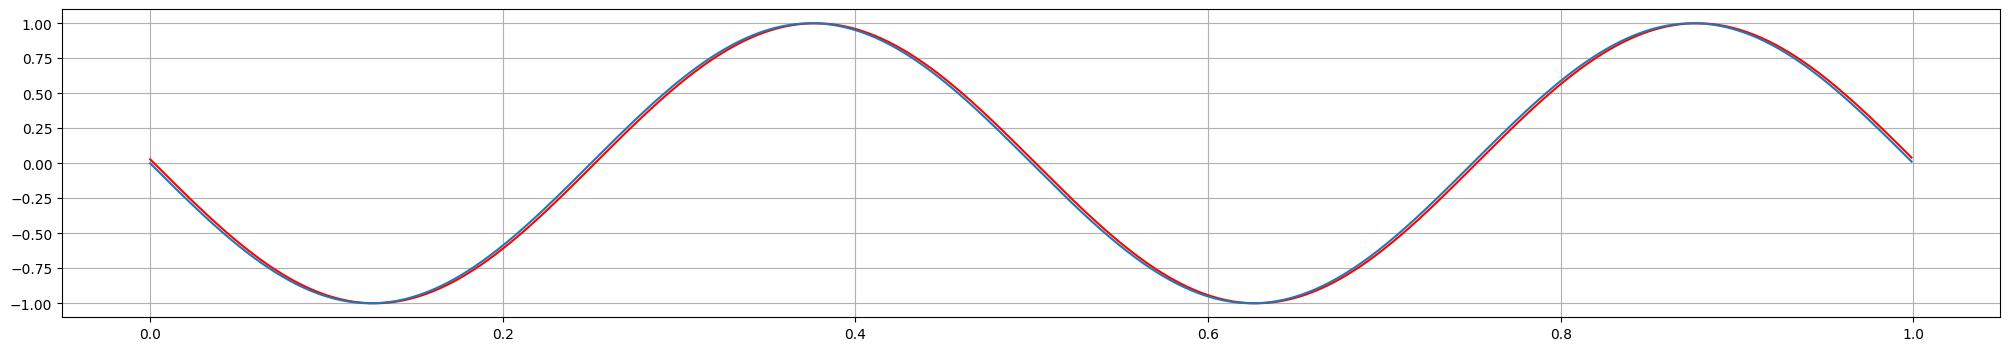

In [9]:
t = nIter*dt
x = np.arange(minX, maxX, step=dx)

for iloc in range(len(df)):
# for iloc in range(10):
    currV = minVx + iloc * dVx
    print(f"Vx[{iloc}] = {currV}")

    plt.figure(figsize=(25,4))
    y = df.iloc[iloc]
    plt.plot(x, y, '-r') #plot numerical approximation
    plt.plot(x, np.sin((x - t*currV)*4*math.pi)) #plot the exact solution for this Vx
    plt.grid()
    plt.show()
